In [1]:
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt
import seaborn as sns 
import librosa
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib as mpl

In [3]:
metadata = pd.read_csv('metadata.csv')
plt.style.use('seaborn')

### Plotting the gender distribution

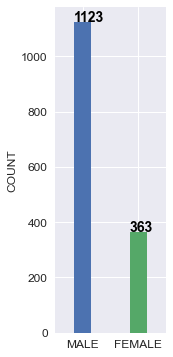

In [6]:
gender_labels = metadata['g'].unique()[::-1] # getiing the genders
gender_count = []
for i in range(len(gender_labels)):
    gender_count.append(len(metadata[(metadata['g'] == gender_labels[i])])) # counting each label and storing in a list

fig, ax = plt.subplots(figsize=(2, 6))
ax.bar(2,gender_count[0], align='center',alpha=1,capsize=5,width=.6)
ax.bar(4,gender_count[1], align='center',alpha=1,capsize=5,width=.6)
for i, v in enumerate(gender_count):
    ax.text(2*(i+1)-.3,v + 3, str(v), color='black', fontweight='bold',fontsize=14) # ploting the exact count
plt.xticks([2,4], ['MALE','FEMALE'])
plt.ylabel('COUNT', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlim(1,5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
plt.show()

### Plotting the age distribution

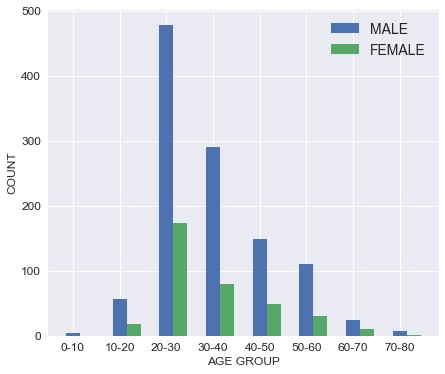

In [7]:
age_labels = metadata['a'].unique() # storing every unique age
age_count_male = []
age_count_female = []
for i in range(len(age_labels)): # storing count of each age for male and female
    if age_labels[i] == 'X':
        age_labels[i] = 0
    age_count_male.append(len(metadata[(metadata['a'] == age_labels[i])  & (metadata['g']=='male')]))
    age_count_female.append(len(metadata[(metadata['a'] == age_labels[i]) & (metadata['g']=='female')]))

age_count_male = metadata[(metadata['g']=='male')]['a'].values
age_count_female = metadata[(metadata['g']=='female')]['a'].values

age_labels = ['0-10','10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'] # taking 8 age groups

age_grouped_male = []
age_grouped_female = []

for i in age_labels: # storing count for age group for male and female
    age_grouped_male.append(len(age_count_male[(age_count_male > (int(i.split('-')[0])-1)) & \
                                        (age_count_male < int(i.split('-')[1]))]))
    age_grouped_female.append(len(age_count_female[(age_count_female > (int(i.split('-')[0])-1)) & \
                                        (age_count_female < int(i.split('-')[1]))]))
fig, ax = plt.subplots(figsize=(7, 6))
ax.bar(np.arange(0,len(age_labels)),age_grouped_male, align='center',alpha=1,width=.3,label='MALE')
ax.bar(np.arange(0,len(age_labels))+.3,age_grouped_female, align='center',alpha=1,width=.3,label='FEMALE')
ax.legend(frameon=False,loc='upper right',fontsize=14)
plt.ylabel('COUNT', fontsize=12)
plt.xlabel('AGE GROUP', fontsize=12)
plt.xticks(np.arange(0,len(age_labels)), age_labels,rotation=0,fontsize=12)
plt.yticks(fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
plt.show()

### Plotting the health status

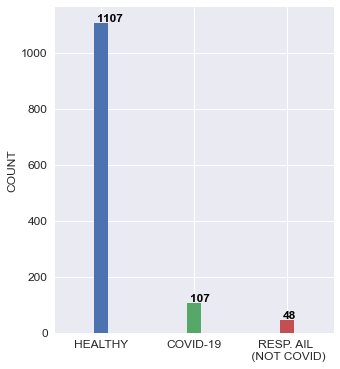

In [10]:
df = metadata.replace('None', np.nan)
df= metadata.replace(np.nan, False)
df['healthy'] = False
df['covid'] = 0.0
df['unhealthy_but_no_covid'] = False

for i in range(len(df)):
    # taking the following as healthy
    if (df.at[i,'covid_status']=='healthy') & (df.at[i,'asthma']==False) &\
    (df.at[i,'cld']==False) & (df.at[i,'cold']==False) &\
    (df.at[i,'cough']==False) & (df.at[i,'pneumonia']==False) &\
    (df.at[i,'fever']==False):
        df.at[i,'healthy'] = True
        
    # taking these class as having covid
    if (df.at[i,'covid_status']=='positive_asymp'):
        df.at[i,'covid'] = 1
        
    if (df.at[i,'covid_status']=='positive_mild'):
        df.at[i,'covid'] = 2

    if (df.at[i,'covid_status']=='positive_moderate'):
        df.at[i,'covid'] = 3

    # following these are unhealthy but don't have covid
    if (df.at[i,'covid_status']=='resp_illness_not_identified') & ((df.at[i,'asthma']==True) |\
    (df.at[i,'cld']==True) | (df.at[i,'cold']==True) |\
    (df.at[i,'cough']==True) | (df.at[i,'pneumonia']==True)):
        df.at[i,'unhealthy_but_no_covid'] = True
        
health_count = []

health_count.append(len(df[(df['healthy']==True)]))

health_count.append(len(df[(df['covid']>0)]))

health_count.append(len(df[(df['unhealthy_but_no_covid']==True)]))


fig, ax = plt.subplots(figsize=(5, 6))
ax.bar(2, health_count[0], align='center',alpha=1,width=.3)
ax.bar(4, health_count[1], align='center',alpha=1,width=.3)
ax.bar(6, health_count[2], align='center',alpha=1,width=.3)

plt.xticks([2,4,6],['HEALTHY','COVID-19','RESP. AIL \n (NOT COVID)'],rotation=0,fontsize=12)
for i, v in enumerate(health_count):
    ax.text(2*(i+1)-.1,v + 3, str(v), color='black', fontweight='bold',fontsize=12)
plt.ylabel('COUNT', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(1,7)
plt.show()